## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> Resource </td>
        <td> Resource Consumption </td>
    </tr>
    <tr>
        <td> Production </td>
        <td> Harvest </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> <b> TomQuality </b> </td>
        <td> <b> Tomato Quality </b> </td>
    </tr>
    <tr>
        <td> LabAnalysis </td>
        <td> Analysis of irrigation and drain samples </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [1]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("../Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

## Tomato Sensor

In [5]:
df = {}
for file in files:
    df[file] = pd.read_csv("../Dataset/"+file+"/TomQuality.csv")

In [6]:
for i in df:
    print(i,"\n",df[i].head(),"\n")
    

AICU 
    %time  Flavour  TSS  Acid  %Juice  Bite  Weight DMC_fruit
0  43880       80  9.0  14.5      67   219     9.0       NaN
1  43894       74  8.3  13.6      60   277    10.1       NaN
2  43908       71  8.3  12.1      53   285    11.4      8.73
3  43922       76  8.9  13.3      58   334    10.0      9.07
4  43936       73  8.9  12.5      51   290    11.0      8.71 

Automatoes 
    %time  Flavour   TSS  Acid  %Juice  Bite  Weight  DMC_fruit
0  43880        85  8.6  14.5      69   141    8.80        NaN
1  43894        77  8.6  15.2      62   236    9.03        NaN
2  43908        71  8.0  13.3      55   348   10.77       8.86
3  43922        78  8.8  13.8      64   277    9.10       9.51
4  43936        78  8.9  14.0      63   237    9.50       9.26 

Digilog 
    %time  Flavour   TSS  Acid  %Juice  Bite  Weight  DMC_fruit
0  43880        78  8.6  13.3      68   193     9.5        NaN
1  43894        78  8.7  14.8      61   193     9.4        NaN
2  43908        73  8.4  13.9    

In [7]:
for i in df:
    df[i]['%time'] = pd.to_datetime(df[i]['%time'], unit='d',origin='1899-12-30')


In [13]:
col = df['AICU'].columns
col = col[1:]

In [23]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in df:
    df[i] = df[i].fillna(df[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_20036\2813979838.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[i] = df[i].fillna(df[i].mean())
C:\Users\vivek\AppData\Local\Temp\ipykernel_20036\2813979838.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[i] = df[i].fillna(df[i].mean())


In [24]:
for i in df:
    print(i,"\n",df[i].head(),"\n")

AICU 
        %time  Flavour  TSS  Acid  %Juice   Bite  Weight  DMC_fruit
0 2020-02-19     80.0  9.0  14.5    67.0  219.0     9.0   8.933333
1 2020-03-04     74.0  8.3  13.6    60.0  277.0    10.1   8.933333
2 2020-03-18     71.0  8.3  12.1    53.0  285.0    11.4   8.730000
3 2020-04-01     76.0  8.9  13.3    58.0  334.0    10.0   9.070000
4 2020-04-15     73.0  8.9  12.5    51.0  290.0    11.0   8.710000 

Automatoes 
        %time  Flavour   TSS  Acid  %Juice   Bite  Weight  DMC_fruit
0 2020-02-19        85  8.6  14.5    69.0  141.0    8.80   8.946667
1 2020-03-04        77  8.6  15.2    62.0  236.0    9.03   8.946667
2 2020-03-18        71  8.0  13.3    55.0  348.0   10.77   8.860000
3 2020-04-01        78  8.8  13.8    64.0  277.0    9.10   9.510000
4 2020-04-15        78  8.9  14.0    63.0  237.0    9.50   9.260000 

Digilog 
        %time  Flavour   TSS  Acid  %Juice   Bite  Weight  DMC_fruit
0 2020-02-19        78  8.6  13.3    68.0  193.0     9.5   9.463333
1 2020-03-04        

C:\Users\vivek\AppData\Local\Temp\ipykernel_20036\2652991613.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


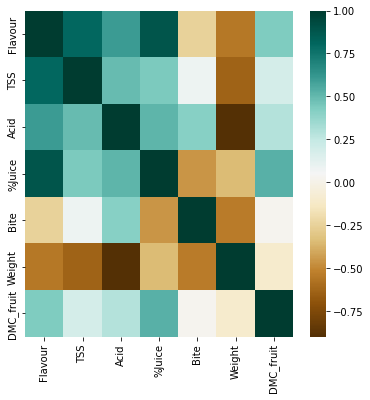

In [25]:
from pandas.plotting import scatter_matrix
df_corr = df['AICU'].corr()

f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [29]:

def plot(target):
    
    sns.set()
    plt.figure(figsize=(20, 20),facecolor='lightgray')

    plt.subplot(321)
    for i in df:
        plt.plot(df[i][target], df[i]["Flavour"])
    plt.legend(files)
    plt.title("Flavour vs {target}".format(target=target))
    plt.xlabel('Flavour')
    plt.ylabel(target)


    plt.subplot(322)
    for i in df:
        plt.plot(df[i][target], df[i]['TSS'])
    plt.legend(files)
    plt.title("TSS vs {target}".format(target=target))
    plt.xlabel('TSS')
    plt.ylabel(target)


    plt.subplot(323)
    for i in df:
        plt.plot(df[i][target], df[i]['Acid'])
    plt.legend(files)
    plt.title("Acid vs {target}".format(target=target))
    plt.xlabel('Acid')
    plt.ylabel(target)


    plt.subplot(324)
    for i in df:
        plt.plot(df[i][target], df[i]['%juice'])
    plt.legend(files)
    plt.title("%juice vs {target}".format( target=target))
    plt.xlabel('%juice')
    plt.ylabel(target)
    
    plt.subplot(325)
    for i in df:
        plt.plot(df[i][target], df[i]["Bite"])
    plt.legend(files)
    plt.title("Bite vs {target}".format(target=target))
    plt.xlabel('Bite')
    plt.ylabel(target)


    plt.subplot(326)
    for i in df:
        plt.plot(df[i][target], df[i]['Weight'])
    plt.legend(files)
    plt.title("Weight vs {target}".format(target=target))
    plt.xlabel('Weight')
    plt.ylabel(target)
    
    plt.show()



#Stem_thick  Cum_trusses  stem_dens   plant_dens

KeyError: 'Flavour'

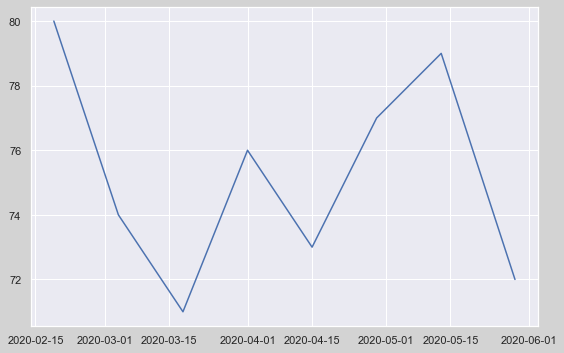

In [30]:
plot("%time")

In [ ]:
data = df['AICU']
data.info()